In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)

# lecture csv

In [2]:
df = pd.read_csv('restaurants2.csv')

In [3]:
df

,commentaire_1,commentaire_2,genre,mesure_de_securite,nom,note,prix,rang,total_commentaire
0,“AMBIANCE VILLA: AN EXOTIC FEEL”,“an Eden - a Culinary delight - Exceptional”,"Mediterranean, European",NaN,Ambiance La Villa,4.5,$$ - $$$,1.0,151.0
1,“Faded but fun”,“Dinner with friends”,"French, European",NaN,La Comete,4.0,$$ - $$$,2.0,152.0
2,“Great seafood”,“Top de top frégate oran Algérie”,"Seafood, Mediterranean",NaN,La Fregate,4.5,$,3.0,51.0
3,“Best Gelato in Oran”,“Best Ice Cream Ever!”,"Dessert, Italian",NaN,Vanille Fraise,4.5,$,4.0,53.0
4,“Indian Taste”,“Good tasty Indian food.”,Indian,NaN,Maharaja Indian Restaurant,4.0,$$ - $$$,5.0,109.0
...,...,...,...,...,...,...,...,...,...
116,NaN,NaN,"American, Steakhouse",NaN,Sky Lounge,NaN,NaN,117.0,NaN
117,NaN,NaN,Dessert,NaN,MIZA Gelato,NaN,NaN,118.0,NaN
118,NaN,NaN,"French, American",NaN,Lunchbox By Sheraton Oran,NaN,$$ - $$$,119.0,NaN
119,NaN,NaN,Algerian,NaN,Sunset Canastel,NaN,NaN,120.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   commentaire_1       90 non-null     object 
 1   commentaire_2       76 non-null     object 
 2   genre               95 non-null     object 
 3   mesure_de_securite  3 non-null      object 
 4   nom                 121 non-null    object 
 5   note                90 non-null     float64
 6   prix                72 non-null     object 
 7   rang                121 non-null    float64
 8   total_commentaire   90 non-null     float64
dtypes: float64(3), object(6)
memory usage: 8.6+ KB


In [5]:
restaurants = df[['rang','nom','note','genre','prix','total_commentaire','mesure_de_securite','commentaire_1','commentaire_2']]

restaurants


,rang,nom,note,genre,prix,total_commentaire,mesure_de_securite,commentaire_1,commentaire_2
0,1.0,Ambiance La Villa,4.5,"Mediterranean, European",$$ - $$$,151.0,NaN,“AMBIANCE VILLA: AN EXOTIC FEEL”,“an Eden - a Culinary delight - Exceptional”
1,2.0,La Comete,4.0,"French, European",$$ - $$$,152.0,NaN,“Faded but fun”,“Dinner with friends”
2,3.0,La Fregate,4.5,"Seafood, Mediterranean",$,51.0,NaN,“Great seafood”,“Top de top frégate oran Algérie”
3,4.0,Vanille Fraise,4.5,"Dessert, Italian",$,53.0,NaN,“Best Gelato in Oran”,“Best Ice Cream Ever!”
4,5.0,Maharaja Indian Restaurant,4.0,Indian,$$ - $$$,109.0,NaN,“Indian Taste”,“Good tasty Indian food.”
...,...,...,...,...,...,...,...,...,...
116,117.0,Sky Lounge,NaN,"American, Steakhouse",NaN,NaN,NaN,NaN,NaN
117,118.0,MIZA Gelato,NaN,Dessert,NaN,NaN,NaN,NaN,NaN
118,119.0,Lunchbox By Sheraton Oran,NaN,"French, American",$$ - $$$,NaN,NaN,NaN,NaN
119,120.0,Sunset Canastel,NaN,Algerian,NaN,NaN,NaN,NaN,NaN


# valeurs manquantes par colonne

<AxesSubplot:>

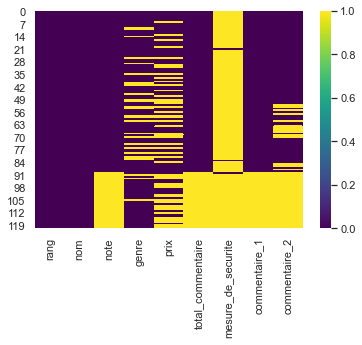

In [6]:

missing_values = restaurants.isnull()
sns.heatmap(data=missing_values, cmap='viridis')

# les restaurants prennent ils ou pas des mesures de sécurité?

In [7]:
restaurants['mesure_de_securite'] = restaurants['mesure_de_securite'].fillna('sans mesure de sécurité')

<ipython-input-8-970dc56bd816>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_ylabel('')


Text(0.5, 1.0, ' les restaurants prennent ils ou pas des mesures de sécurité?')

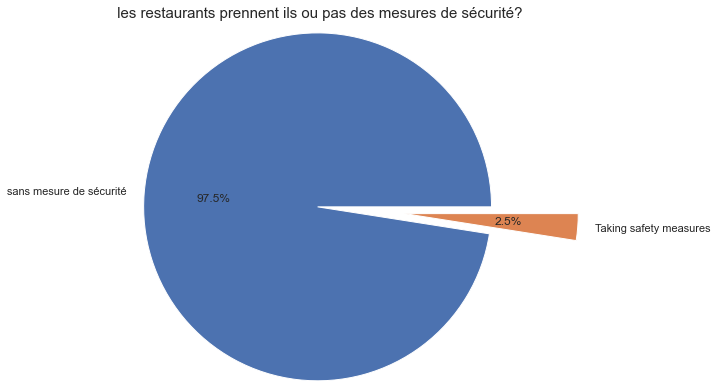

In [8]:
restaurants['mesure_de_securite'].value_counts().plot.pie(radius = 2, autopct='%1.1f%%', explode=(0,1), startangle=0)
plt.axes().set_ylabel('')
plt.title(' les restaurants prennent ils ou pas des mesures de sécurité?', pad = 80, fontsize = 15)

# Nombre de restaurants par note


In [9]:
restaurants['note'].value_counts()

4.0    27
5.0    18
4.5    16
3.5    14
3.0     7
2.5     6
1.0     2
Name: note, dtype: int64

In [10]:
#nb restau par tranche de prix
restaurants['prix'].value_counts()

$$ - $$$    34
$           30
$$$$         8
Name: prix, dtype: int64

In [11]:
price_map = {'$': 1, '$$ - $$$': 2, '$$$$': 3}
restaurants['prix'] = restaurants['prix'].map(price_map, na_action='ignore')


In [12]:
restaurants['prix'].value_counts()

2.0    34
1.0    30
3.0     8
Name: prix, dtype: int64

Text(0.5, 1.0, 'Répartition des prix des restaurants')

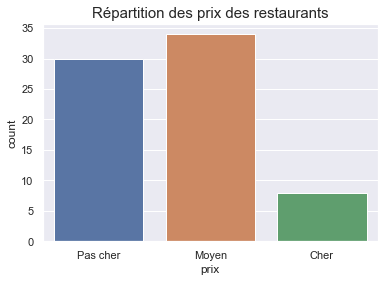

In [13]:
price_order = [1.0,2.0,3.0]
p = sns.countplot(x = "prix", data = restaurants, order = price_order)
p.set_xticklabels(['Pas cher','Moyen','Cher'])
p.set_title('Répartition des prix des restaurants', fontsize = 15)

# le restaurant avec le plus de commentaires

In [14]:
restaurants[restaurants['total_commentaire'] == restaurants['total_commentaire'].max()]

,rang,nom,note,genre,prix,total_commentaire,mesure_de_securite,commentaire_1,commentaire_2
8,9.0,Le Mediterraneen,4.0,"French, Seafood",2.0,262.0,sans mesure de sécurité,“Give it a try”,“Fish galore”


# liste du top 10 restaurants par note et pas nombre de commentaires

In [15]:
restaurants.sort_values(['total_commentaire','note'],ascending=[False, False]).head(10)

,rang,nom,note,genre,prix,total_commentaire,mesure_de_securite,commentaire_1,commentaire_2
8,9.0,Le Mediterraneen,4.0,"French, Seafood",2.0,262.0,sans mesure de sécurité,“Give it a try”,“Fish galore”
1,2.0,La Comete,4.0,"French, European",2.0,152.0,sans mesure de sécurité,“Faded but fun”,“Dinner with friends”
0,1.0,Ambiance La Villa,4.5,"Mediterranean, European",2.0,151.0,sans mesure de sécurité,“AMBIANCE VILLA: AN EXOTIC FEEL”,“an Eden - a Culinary delight - Exceptional”
5,6.0,Bekhchi ' S,4.0,"Mediterranean, European",2.0,140.0,sans mesure de sécurité,“Great Place to experience Mediterranean...”,“To try”
4,5.0,Maharaja Indian Restaurant,4.0,Indian,2.0,109.0,sans mesure de sécurité,“Indian Taste”,“Good tasty Indian food.”
10,11.0,Le Ciel D'Oran,3.5,NaN,3.0,71.0,sans mesure de sécurité,“this was an average please”,“very good”
12,13.0,Restaurant Cintra,3.5,Gastropub,2.0,63.0,sans mesure de sécurité,“reopened Feb 2014. Good stab at a...”,“Lovely restaurant”
3,4.0,Vanille Fraise,4.5,"Dessert, Italian",1.0,53.0,sans mesure de sécurité,“Best Gelato in Oran”,“Best Ice Cream Ever!”
2,3.0,La Fregate,4.5,"Seafood, Mediterranean",1.0,51.0,sans mesure de sécurité,“Great seafood”,“Top de top frégate oran Algérie”
9,10.0,It Side.,4.0,NaN,2.0,42.0,sans mesure de sécurité,“Turkish Food”,“I loved the place a lot! It's a family...”
